In [1]:
import tensorflow as tf

tf.__version__

'2.7.0'

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16585900098895624549
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6267797504
locality {
  bus_id: 1
  links {
  }
}
incarnation: 14808169716892447926
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2070 Super with Max-Q Design, pci bus id: 0000:01:00.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [1]:
from music21 import *
import pandas as pd
import sys
import matplotlib.pyplot as plt
import numpy as np
import pickle
import glob
from __future__ import print_function, division
from music21 import converter, instrument, note, chord, stream
from tensorflow.keras.layers import Input, Dense, Reshape, Dropout, Bidirectional
from tensorflow.keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from keras.layers import CuDNNLSTM

In [2]:
from music21 import converter, instrument, note, chord
import glob

notes = []
durations = []


for file in glob.glob('su/*.mid') :
    try :
        midi = converter.parse(file) 
        notes_to_parse = None
    except :
        print(file)
    try:      
        parts = instrument.partitionByInstrument(midi)
    except TypeError:
        print('## 1 {} 파일 읽기 에러.'.format(file))
    if parts: 
        print('## 2 {} 여러 악기 사용 파일'.format(file))
        notes_to_parse = parts.parts[0].recurse()
    else: 
        print('## 3 {} 단일 악기 사용 파일'.format(file))
        notes_to_parse = midi.flat.notes
        
    for element in notes_to_parse:

        if isinstance(element, chord.Chord):
            notes.append('.'.join(n.nameWithOctave for n in element.pitches))
            durations.append(element.duration.quarterLength)

        if isinstance(element, note.Note):
            if element.isRest:
                notes.append(str(element.name))
                durations.append(element.duration.quarterLength)
            else:
                notes.append(str(element.nameWithOctave))
                durations.append(element.duration.quarterLength)

## 3 su\Schubert_D783_no15_p01.mid 단일 악기 사용 파일
## 3 su\Schubert_D783_no15_p02.mid 단일 악기 사용 파일
## 3 su\Schubert_D783_no15_p03.mid 단일 악기 사용 파일
## 3 su\Schubert_D783_no15_p04.mid 단일 악기 사용 파일
## 3 su\Schubert_D783_no15_p05.mid 단일 악기 사용 파일
## 3 su\Schubert_D783_no15_p06.mid 단일 악기 사용 파일
## 3 su\Schubert_D783_no15_p07.mid 단일 악기 사용 파일
## 3 su\Schubert_D783_no15_p08.mid 단일 악기 사용 파일
## 3 su\Schubert_D783_no15_p09.mid 단일 악기 사용 파일
## 3 su\Schubert_D783_no15_p10.mid 단일 악기 사용 파일
## 3 su\Schubert_D783_no15_p11.mid 단일 악기 사용 파일
## 3 su\Schubert_D783_no15_p12.mid 단일 악기 사용 파일
## 3 su\Schubert_D783_no15_p13.mid 단일 악기 사용 파일
## 3 su\Schubert_D783_no15_p14.mid 단일 악기 사용 파일
## 3 su\Schubert_D783_no15_p15.mid 단일 악기 사용 파일
## 3 su\Schubert_D783_no15_p16.mid 단일 악기 사용 파일
## 3 su\Schubert_D783_no15_p17.mid 단일 악기 사용 파일
## 3 su\Schubert_D783_no15_p18.mid 단일 악기 사용 파일
## 3 su\Schubert_D783_no15_p19.mid 단일 악기 사용 파일
## 3 su\Schubert_D783_no15_p20.mid 단일 악기 사용 파일
## 3 su\Schubert_D783_no15_p21.mid 단일 악기 사용 파일
## 3 su\Schub

In [4]:
print('\nduration', 'pitch')
for n,d in zip(notes,durations):
    print(d, '\t', n)


duration pitch
1.25 	 C5
0.25 	 C3
1/12 	 C5
1/3 	 E4.G3
0.5 	 C#5
1.25 	 C5
0.25 	 E4.G3.B-3
0.25 	 C3
0.25 	 F4.G#3.C4
1/3 	 C#5
1/3 	 C5
0.25 	 C4.G#3.F4
11/12 	 C5
0.25 	 C3
0.25 	 E4.G3.B-3
1/3 	 C#5
0.25 	 C5.B-3.G3.E4
0.25 	 C5.C#5
1/3 	 E-5.C3
4/3 	 C#5
0.25 	 F4.G#3.C4
5/12 	 C#5
1.5 	 C5
0.25 	 C4.G#3
0.25 	 C3
0.25 	 G3.E4.B-3
1/3 	 C#5
0.25 	 C5.B-3.G3
1/3 	 C5
1/3 	 C3
2/3 	 C5
0.25 	 E-4.C4.G#3
0.5 	 C#5
0.25 	 C4.C5.G#3
0.25 	 E-2
1.0 	 C5
0.25 	 C#4.G3.E-3
0.25 	 B-4
0.25 	 B-4.C#4.G3.E-3
0.5 	 G#3.G#4.C4
5/3 	 C5
0.25 	 C3
0.25 	 E4.G3.B-3
0.5 	 C#5
4/3 	 C5
0.25 	 E4.B-3.G3
0.25 	 C3
0.25 	 F4.G#3.C4
1/3 	 C#5
1.25 	 C5
0.25 	 C4.G#3.F4
0.25 	 C3
1/12 	 C5
0.25 	 E4.G3.B-3
1/3 	 C#5
0.25 	 C5.B-3.G3
0.25 	 C5.C#5
1/3 	 E-5.C3
1.75 	 C#5
0.25 	 F4.C4.G#3
0.25 	 C4.G#3
2/3 	 C5
5/6 	 C5
0.25 	 C3
0.25 	 G3.E4.B-3
0.5 	 C#5
0.25 	 C5.G3.B-3
1.0 	 C5
1/3 	 C3
0.25 	 E-4.C4.G#3
1/3 	 C#5
0.25 	 C5.E-4.G#3.C4
1.25 	 C5
0.25 	 E-2
0.25 	 C#4.G3.E-3
0.25 	 B-4
0.25 	 B-4.G3.

0.25 	 E4.G3.B-3
0.25 	 C#5
0.25 	 E4.B-3.G3
5/3 	 C5
0.25 	 C3
0.25 	 F4.G#3.C4
0.25 	 C#5
0.25 	 C5
0.25 	 F4.C4.G#3
17/12 	 C5
0.25 	 C3
1/3 	 E4.G3.B-3
0.25 	 C#5
0.25 	 E4.B-3.C5.G3
0.25 	 C5.C#5
0.25 	 E-5.C3
1.25 	 C#5
0.25 	 F4.C4.G#3
1.75 	 C5
0.25 	 F4.C4.G#3
0.25 	 C3
0.25 	 E4.G3.B-3
0.25 	 C#5
0.5 	 C5
0.25 	 B-3.G3.E4
0.25 	 C3
1.0 	 C5
0.25 	 E-4.C4.G#3
1/3 	 C#5
0.25 	 E-4.C4.G#3
2/3 	 C5
0.25 	 E-2
1.25 	 C5
0.25 	 C#4.E-3.G3
1/3 	 B-4
0.25 	 C#4.B-4.G3
0.5 	 E-3
1.0 	 G#4.C4.G#3
2.0 	 C5
0.25 	 C3
1/3 	 G3.E4.B-3
0.25 	 C#5
1.75 	 C5
0.25 	 G3.B-3.E4
0.25 	 C3
1/3 	 F4.C4.G#3
0.25 	 C#5
5/3 	 C5
0.25 	 F4.G#3.C4
0.25 	 C3
1/3 	 E4.G3.B-3
0.25 	 C#5
0.25 	 E4.C5.G3.B-3
1/12 	 C#5
0.25 	 C5.C#5
0.25 	 E-5.C3
4/3 	 C#5
0.25 	 F4.C4.G#3
5/3 	 C5
0.25 	 F4.C4.G#3
0.25 	 C3
0.25 	 E4.G3.B-3
0.25 	 C#5
0.5 	 C5
0.25 	 B-3.G3.E4
0.25 	 C3
1.0 	 C5
0.25 	 E-4.C4.G#3
0.5 	 C#5
0.25 	 C4.E-4.G#3
2/3 	 C5
0.25 	 E-2
0.25 	 C5
1/12 	 E-2
1.0 	 C5
0.25 	 G3.E-3.C#4
0.25 	 B-4
0.5 	

1/3 	 C#5.G4.E-4.E-3
2/3 	 C#5
0.5 	 G#4.E-4.G#2
1/3 	 C#5
5/6 	 G#4.E-4.G#2
1/3 	 C5.E-3
0.25 	 C5.E-4.G#4.E-3
1.0 	 C5.G4.E-4
4/3 	 E-2
1/3 	 E-3
17/12 	 E-2
0.25 	 B-4.G4.C#4
2.0 	 B-4
0.5 	 C#4.E-3.G4
1.25 	 G#4
0.75 	 G#2.C4.E-3
1/12 	 G#4
1/3 	 C5.G#4
5/3 	 G#4.C5
1/3 	 C2
0.25 	 B-3.C3.E3
1/3 	 G4
0.25 	 G4.C5.C3.B-3.E3
4/3 	 C5
0.75 	 G4
0.25 	 F2
0.25 	 F4.F3.C3.G#3
0.25 	 F4.G#3.F3.C3
0.25 	 C5.G#4.C3
5/3 	 C5.G#4
1/3 	 C2
1/3 	 C3.B-3.E3
0.25 	 G4
0.25 	 C5.C3.E3.G4.B-3
1.0 	 G4.C5
1/3 	 F2
0.25 	 F4.F3.C3.G#3
0.5 	 F5.F4.C5.G#4.F2.F3
0.75 	 E-5.E-4.G4.C5.B-4
2/3 	 G3
1.25 	 G2
0.75 	 G3
0.25 	 C#5.E-4.G4
1/3 	 C#5.G4.E-4
0.75 	 E-3
0.25 	 G3
1.0 	 C#5
4/3 	 G#4.E-4.G#2
0.5 	 C5.E-3
1/3 	 C5.G#4.E-3.E-4
0.75 	 C5.E-4.G4
3.25 	 E-2
1/3 	 E-3
0.25 	 B-4.G4.C#4
1.5 	 B-4
1.0 	 G4.E-3.C#4
0.5 	 B-4
1.5 	 G#4
0.75 	 C4.G#2.E-3
3.25 	 C5
0.25 	 C3
0.25 	 E4.G3.B-3
0.5 	 C#5
0.25 	 E4.B-3.G3
1/3 	 C5
23/12 	 C5
0.25 	 C3
0.25 	 G#3.C4.F4
0.5 	 C#5
1/3 	 F4.C4.G#3
1.75 	 C5
0.25 	 C

In [3]:
len(notes)

3652

In [5]:
from keras.utils import np_utils

n_vocab = len(set(notes))
n_dur = len(set(durations))

sequence_length = 100
# 모든 계이름의 이름을 pitchnames 변수에 저장.
# set 으로 중복을 피하고, sorted 함수로 정렬함.
pitchnames = sorted(set(item for item in notes))
durnames = sorted(set(d for d in durations))

# 각 계이름을 숫자로 바꾸는 dictionary(사전)을 만든다.
note_to_int = dict((note, number) for number, note in enumerate(pitchnames))
duration_to_int = dict((d, number) for number, d in enumerate(durnames))

notes_network_input = []
notes_network_output = []

durations_network_input = [] #duration 관련 input
durations_network_output = []



# 입력 시퀀스를 만든다.
for i in range(0, len(notes) - sequence_length, 1):
    notes_sequence_in = notes[i:i + sequence_length]
    notes_sequence_out = notes[i + sequence_length]
    notes_network_input.append([note_to_int[char] for char in notes_sequence_in])
    notes_network_output.append(note_to_int[notes_sequence_out])
    
    durations_sequence_in = durations[i:i + sequence_length]
    durations_sequence_out = durations[i + sequence_length]
    durations_network_input.append([duration_to_int[dur] for dur in durations_sequence_in])
    durations_network_output.append(duration_to_int[durations_sequence_out])

n_patterns = len(notes_network_input)

# 데이터 입력 형태를 LSTM 레이어에 알맞게 변경함.
notes_network_input = np.reshape(notes_network_input, (n_patterns, sequence_length))  ###
notes_network_input = notes_network_input / float(n_vocab)
durations_network_input = np.reshape(durations_network_input, (n_patterns, sequence_length))####

network_input = [notes_network_input, durations_network_input]


notes_network_output = np_utils.to_categorical(notes_network_output, num_classes=n_vocab)
durations_network_output = np_utils.to_categorical(durations_network_output, num_classes=n_dur)

network_output = [notes_network_output, durations_network_output]




In [6]:
notes_network_input.shape

(3552, 100)

In [7]:
n_dur

33

In [8]:
n_vocab

496

In [9]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import LSTM, Dropout, Dense, Activation, Embedding,Concatenate
from keras.layers import CuDNNLSTM
from tensorflow.keras.optimizers import RMSprop

In [10]:
embed_size = 100

notes_in = Input(shape = (None,))
durations_in = Input(shape = (None,))

x1 = Embedding(n_vocab, embed_size)(notes_in)
x2 = Embedding(n_dur, embed_size)(durations_in) 

x = Concatenate()([x1,x2])

x = CuDNNLSTM(256, return_sequences=True)(x)
x = Dropout(0.3)(x)

x = CuDNNLSTM(512, return_sequences=True)(x)
x = Dropout(0.3)(x)

y = CuDNNLSTM(256)(x)
y = Dropout(0.3)(y)

notes_out = Dense(n_vocab, activation = 'softmax', name = 'pitch')(y)
durations_out = Dense(n_dur, activation = 'softmax', name = 'duration')(y)

model = Model([notes_in, durations_in], [notes_out, durations_out])

opti = RMSprop(learning_rate = 0.001)
model.compile(loss=['categorical_crossentropy', 'categorical_crossentropy'], optimizer=opti)


In [11]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, None, 100)    49600       ['input_1[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, None, 100)    3300        ['input_2[0][0]']                
                                                                                              

In [12]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

filepath = "./su/weights-improvement-{epoch:02d}-{loss:.4f}-bigger.hdf5"    
checkpoint = ModelCheckpoint(
    filepath, monitor='loss',
    verbose=1,        
    save_best_only=True,        
    mode='min'
)
earlystopping = EarlyStopping(monitor='loss', patience =10)

callbacks_list = [checkpoint,earlystopping ]     

history = model.fit(network_input, network_output, epochs=300, batch_size=64, callbacks=callbacks_list)
#weights-improvement-149-0.0527-bigger.hdf5

Epoch 1/300
56/56 [==============================] - ETA: 0s - loss: 7.0207 - pitch_loss: 4.9191 - duration_loss: 2.1016
Epoch 00001: loss improved from inf to 7.02075, saving model to ./su\weights-improvement-01-7.0207-bigger.hdf5
56/56 [==============================] - 11s 69ms/step - loss: 7.0207 - pitch_loss: 4.9191 - duration_loss: 2.1016
Epoch 2/300
55/56 [============================>.] - ETA: 0s - loss: 6.6560 - pitch_loss: 4.6938 - duration_loss: 1.9621
Epoch 00002: loss improved from 7.02075 to 6.66258, saving model to ./su\weights-improvement-02-6.6626-bigger.hdf5
56/56 [==============================] - 4s 64ms/step - loss: 6.6626 - pitch_loss: 4.6998 - duration_loss: 1.9628
Epoch 3/300
55/56 [============================>.] - ETA: 0s - loss: 6.6328 - pitch_loss: 4.6798 - duration_loss: 1.9530 ETA: 0s - loss: 6.6512 - pitch_loss: 4.71
Epoch 00003: loss improved from 6.66258 to 6.63378, saving model to ./su\weights-improvement-03-6.6338-bigger.hdf5
56/56 [==================

56/56 [==============================] - 3s 61ms/step - loss: 4.3503 - pitch_loss: 2.7062 - duration_loss: 1.6440
Epoch 24/300
55/56 [============================>.] - ETA: 0s - loss: 4.2165 - pitch_loss: 2.5932 - duration_loss: 1.6233
Epoch 00024: loss improved from 4.35026 to 4.21558, saving model to ./su\weights-improvement-24-4.2156-bigger.hdf5
56/56 [==============================] - 3s 61ms/step - loss: 4.2156 - pitch_loss: 2.5948 - duration_loss: 1.6208
Epoch 25/300
55/56 [============================>.] - ETA: 0s - loss: 4.1069 - pitch_loss: 2.5188 - duration_loss: 1.5881
Epoch 00025: loss improved from 4.21558 to 4.10828, saving model to ./su\weights-improvement-25-4.1083-bigger.hdf5
56/56 [==============================] - 3s 60ms/step - loss: 4.1083 - pitch_loss: 2.5246 - duration_loss: 1.5837
Epoch 26/300
55/56 [============================>.] - ETA: 0s - loss: 4.0214 - pitch_loss: 2.4652 - duration_loss: 1.5562
Epoch 00026: loss improved from 4.10828 to 4.02635, saving mod

Epoch 47/300
55/56 [============================>.] - ETA: 0s - loss: 1.9922 - pitch_loss: 1.1430 - duration_loss: 0.8492
Epoch 00047: loss improved from 2.09017 to 1.99378, saving model to ./su\weights-improvement-47-1.9938-bigger.hdf5
56/56 [==============================] - 3s 61ms/step - loss: 1.9938 - pitch_loss: 1.1437 - duration_loss: 0.8500
Epoch 48/300
55/56 [============================>.] - ETA: 0s - loss: 1.9253 - pitch_loss: 1.1088 - duration_loss: 0.8165
Epoch 00048: loss improved from 1.99378 to 1.92562, saving model to ./su\weights-improvement-48-1.9256-bigger.hdf5
56/56 [==============================] - 3s 62ms/step - loss: 1.9256 - pitch_loss: 1.1082 - duration_loss: 0.8174
Epoch 49/300
55/56 [============================>.] - ETA: 0s - loss: 1.8577 - pitch_loss: 1.0787 - duration_loss: 0.7791
Epoch 00049: loss improved from 1.92562 to 1.85808, saving model to ./su\weights-improvement-49-1.8581-bigger.hdf5
56/56 [==============================] - 3s 61ms/step - loss:

Epoch 70/300
55/56 [============================>.] - ETA: 0s - loss: 0.7048 - pitch_loss: 0.4149 - duration_loss: 0.2899
Epoch 00070: loss improved from 0.72059 to 0.70705, saving model to ./su\weights-improvement-70-0.7071-bigger.hdf5
56/56 [==============================] - 3s 61ms/step - loss: 0.7071 - pitch_loss: 0.4174 - duration_loss: 0.2896
Epoch 71/300
55/56 [============================>.] - ETA: 0s - loss: 0.6717 - pitch_loss: 0.4138 - duration_loss: 0.2579 ETA: 0s - loss: 0.6662 - pitch_loss: 0.4114 - duration_lo
Epoch 00071: loss improved from 0.70705 to 0.67176, saving model to ./su\weights-improvement-71-0.6718-bigger.hdf5
56/56 [==============================] - 3s 61ms/step - loss: 0.6718 - pitch_loss: 0.4137 - duration_loss: 0.2581
Epoch 72/300
55/56 [============================>.] - ETA: 0s - loss: 0.6370 - pitch_loss: 0.3775 - duration_loss: 0.2595
Epoch 00072: loss improved from 0.67176 to 0.63730, saving model to ./su\weights-improvement-72-0.6373-bigger.hdf5
56/

55/56 [============================>.] - ETA: 0s - loss: 0.2510 - pitch_loss: 0.1535 - duration_loss: 0.0975 ETA: 0s - loss: 0.2375 - pitch_loss: 0.1456 -
Epoch 00093: loss improved from 0.26396 to 0.25178, saving model to ./su\weights-improvement-93-0.2518-bigger.hdf5
56/56 [==============================] - 3s 61ms/step - loss: 0.2518 - pitch_loss: 0.1542 - duration_loss: 0.0976
Epoch 94/300
55/56 [============================>.] - ETA: 0s - loss: 0.2524 - pitch_loss: 0.1448 - duration_loss: 0.1075 ETA: 1s - loss: 0.2467 - pitc - ETA: 0s - loss: 0.2481 - pitch_loss: 0.1435 - duration_loss: 
Epoch 00094: loss did not improve from 0.25178
56/56 [==============================] - 3s 61ms/step - loss: 0.2524 - pitch_loss: 0.1450 - duration_loss: 0.1075
Epoch 95/300
55/56 [============================>.] - ETA: 0s - loss: 0.2401 - pitch_loss: 0.1435 - duration_loss: 0.0966
Epoch 00095: loss improved from 0.25178 to 0.24148, saving model to ./su\weights-improvement-95-0.2415-bigger.hdf5
56

Epoch 118/300
55/56 [============================>.] - ETA: 0s - loss: 0.1960 - pitch_loss: 0.1220 - duration_loss: 0.0740 ETA: 1s - loss: 0.1954 - 
Epoch 00118: loss did not improve from 0.12273
56/56 [==============================] - 3s 61ms/step - loss: 0.1959 - pitch_loss: 0.1213 - duration_loss: 0.0746
Epoch 119/300
55/56 [============================>.] - ETA: 0s - loss: 0.1620 - pitch_loss: 0.0990 - duration_loss: 0.0630 ETA: 2s - loss: 0.1400 - pitch_loss: 0.0845 - duration_loss: 0. - ETA: 2s - loss: 0.138 - ETA: 0s - loss: 0.1498 - pitch_loss: 0.0925 - d
Epoch 00119: loss did not improve from 0.12273
56/56 [==============================] - 3s 60ms/step - loss: 0.1619 - pitch_loss: 0.0990 - duration_loss: 0.0630
Epoch 120/300
55/56 [============================>.] - ETA: 0s - loss: 0.1317 - pitch_loss: 0.0762 - duration_loss: 0.0555
Epoch 00120: loss did not improve from 0.12273
56/56 [==============================] - 3s 60ms/step - loss: 0.1311 - pitch_loss: 0.0759 - durati

Epoch 143/300
55/56 [============================>.] - ETA: 0s - loss: 0.0658 - pitch_loss: 0.0381 - duration_loss: 0.0276 ETA: 0s - loss: 0.0625 - pitch_loss: 0.0348 - dur
Epoch 00143: loss did not improve from 0.06172
56/56 [==============================] - 3s 61ms/step - loss: 0.0654 - pitch_loss: 0.0380 - duration_loss: 0.0274
Epoch 144/300
55/56 [============================>.] - ETA: 0s - loss: 0.0606 - pitch_loss: 0.0338 - duration_loss: 0.0269 ETA: 0s - loss: 0.0606 - pitch_loss: 0.0335 -
Epoch 00144: loss improved from 0.06172 to 0.06038, saving model to ./su\weights-improvement-144-0.0604-bigger.hdf5
56/56 [==============================] - 3s 62ms/step - loss: 0.0604 - pitch_loss: 0.0337 - duration_loss: 0.0267
Epoch 145/300
55/56 [============================>.] - ETA: 0s - loss: 0.0666 - pitch_loss: 0.0350 - duration_loss: 0.0317
Epoch 00145: loss did not improve from 0.06038
56/56 [==============================] - 4s 63ms/step - loss: 0.0667 - pitch_loss: 0.0349 - durat

In [25]:
from tensorflow.keras.models import load_model
model = load_model('./su/weights-improvement-149-0.0527-bigger.hdf5')

In [26]:
import numpy as np 
# 입력 시퀀스를 랜덤하게 주는 부분.
start = np.random.randint(0, len(notes_network_input)-1)

# 숫자를 노트로 매핑하는 Dictionary 생성
int_to_note = dict((number, note) for number, note in enumerate(pitchnames))
int_to_duration = dict((number,d) for number, d in enumerate(durnames))

notes_pattern = notes_network_input[start]###
durations_pattern = durations_network_input[start]


prediction_output = []

for note_index in range(500):
    
    prediction_input = [np.array([notes_pattern]),
                       np.array([durations_pattern])]
        
    notes_prediction, duration_prediction = model.predict(prediction_input, verbose=0)
    
    n_index = np.argmax(notes_prediction)
    d_index = np.argmax(duration_prediction)
    
    note_result = int_to_note[n_index]
    duration_result = int_to_duration[d_index]
    prediction_output.append([note_result, duration_result])
    
    
    notes_pattern = np.append(notes_pattern, n_index)
    notes_pattern = notes_pattern[1:len(notes_pattern)]
    
    durations_pattern = np.append(durations_pattern, d_index)
    durations_pattern = durations_pattern[1:len(durations_pattern)]

In [28]:
notes_pattern

array([ 69., 220., 388., 157., 190., 170., 207., 209.,  42.,  25.,  50.,
       132., 132., 135.,  88., 298.,  54., 135., 460.,  54.,  88., 334.,
        54., 135., 350.,  88., 305.,  54., 196.,  54.,  94.,  73.,  54.,
       334., 121., 135.,  88., 135., 460.,  54., 135., 298., 135.,  88.,
       231.,  54., 113., 207., 135., 225.,  25., 457.,  25., 417., 135.,
        88., 298.,  54., 135., 305.,  92., 135., 350.,  54., 135., 334.,
        88., 298.,  54., 135., 305.,  94.,  54., 246.,  54., 350., 121.,
       135.,  88., 298.,  54., 444., 444.,  88., 135., 231.,  55., 135.,
       401., 207., 135., 457.,  25.,  25., 457.,  25., 417., 186.,  84.,
       186.])

In [20]:
prediction_output

[['C5.E-4.E-3.G#4', 0.25],
 ['C5.G4.E-4', 0.5],
 ['E-2', 0.25],
 ['E-3', 0.25],
 ['B-4.G4.C#4', 0.25],
 ['C#4.B-4.E-3.G4', 0.25],
 ['C4.E-3.G#2', Fraction(7, 3)],
 ['G#4', 2.75],
 ['C5', 3.5],
 ['C3', Fraction(2, 3)],
 ['E4.B-3.G3', 0.25],
 ['C#5', 0.5],
 ['E4.B-3', 0.25],
 ['C5', Fraction(7, 3)],
 ['G3.B-3', 0.25],
 ['C3', 0.5],
 ['C4.F4.G#3', Fraction(1, 3)],
 ['C#5', Fraction(2, 3)],
 ['C5', 1.0],
 ['F4.G#3.C4', 0.25],
 ['C3', 0.25],
 ['C3', 0.25],
 ['C5', 1.25],
 ['E4.B-3.G3', 0.25],
 ['C#5', Fraction(2, 3)],
 ['E4.C5.G3', Fraction(1, 3)],
 ['B-3', 0.5],
 ['C5.C#5', 0.25],
 ['E-5', Fraction(1, 3)],
 ['C3', 0.5],
 ['C#5', 1.5],
 ['F4.G#3.C4', Fraction(1, 3)],
 ['C#5', Fraction(5, 6)],
 ['C4.F4.G#3', 0.25],
 ['C5', Fraction(7, 3)],
 ['C3', 0.5],
 ['E4.B-3.G3', Fraction(1, 3)],
 ['C#5', Fraction(2, 3)],
 ['E4.C5.G3.B-3', 0.25],
 ['C3', Fraction(1, 3)],
 ['C5', 1.5],
 ['C4.E-4.G#3', 0.25],
 ['C#5', Fraction(2, 3)],
 ['C5.E-4.C4.G#3', 0.25],
 ['C5', 1.0],
 ['E-2', Fraction(1, 3)],
 ['C5

In [29]:
import time
midi_stream = stream.Stream()

# 모델이 생성한 값을 기반으로 악보와 화음 객체 만들기
for pattern in prediction_output:
    note_pattern, duration_pattern = pattern
    # 패턴이 화음일 경우
    if ('.' in note_pattern):
        notes_in_chord = note_pattern.split('.')
        chord_notes = []
        for current_note in notes_in_chord:
            new_note = note.Note((current_note))
            new_note.duration = duration.Duration(duration_pattern)
            new_note.storedInstrument = instrument.Piano()
            chord_notes.append(new_note)
        new_chord = chord.Chord(chord_notes)
        midi_stream.append(new_chord)
        
#     elif note_pattern == 'rest':
#     # 패턴이 쉼표일 경우
#         new_note = note.Rest()
#         new_note.duration = duration.Duration(duration_pattern)
#         new_note.storedInstrument = instrument.Violoncello()
#         midi_stream.append(new_note)
    else:
    # 패턴이 하나의 음표일 경우
        new_note = note.Note(note_pattern)
        new_note.duration = duration.Duration(duration_pattern)
        new_note.storedInstrument = instrument.Piano()
        midi_stream.append(new_note)



midi_stream = midi_stream
midi_stream.write('midi', fp='su_output2.mid')

'su_output2.mid'

In [31]:

## Setting up MuseScore.exe within Music21 environment
from music21 import environment

us = environment.Environment()    
us['musescoreDirectPNGPath'] = 'C:/Program Files/MuseScore 3/bin/MuseScore3.exe'


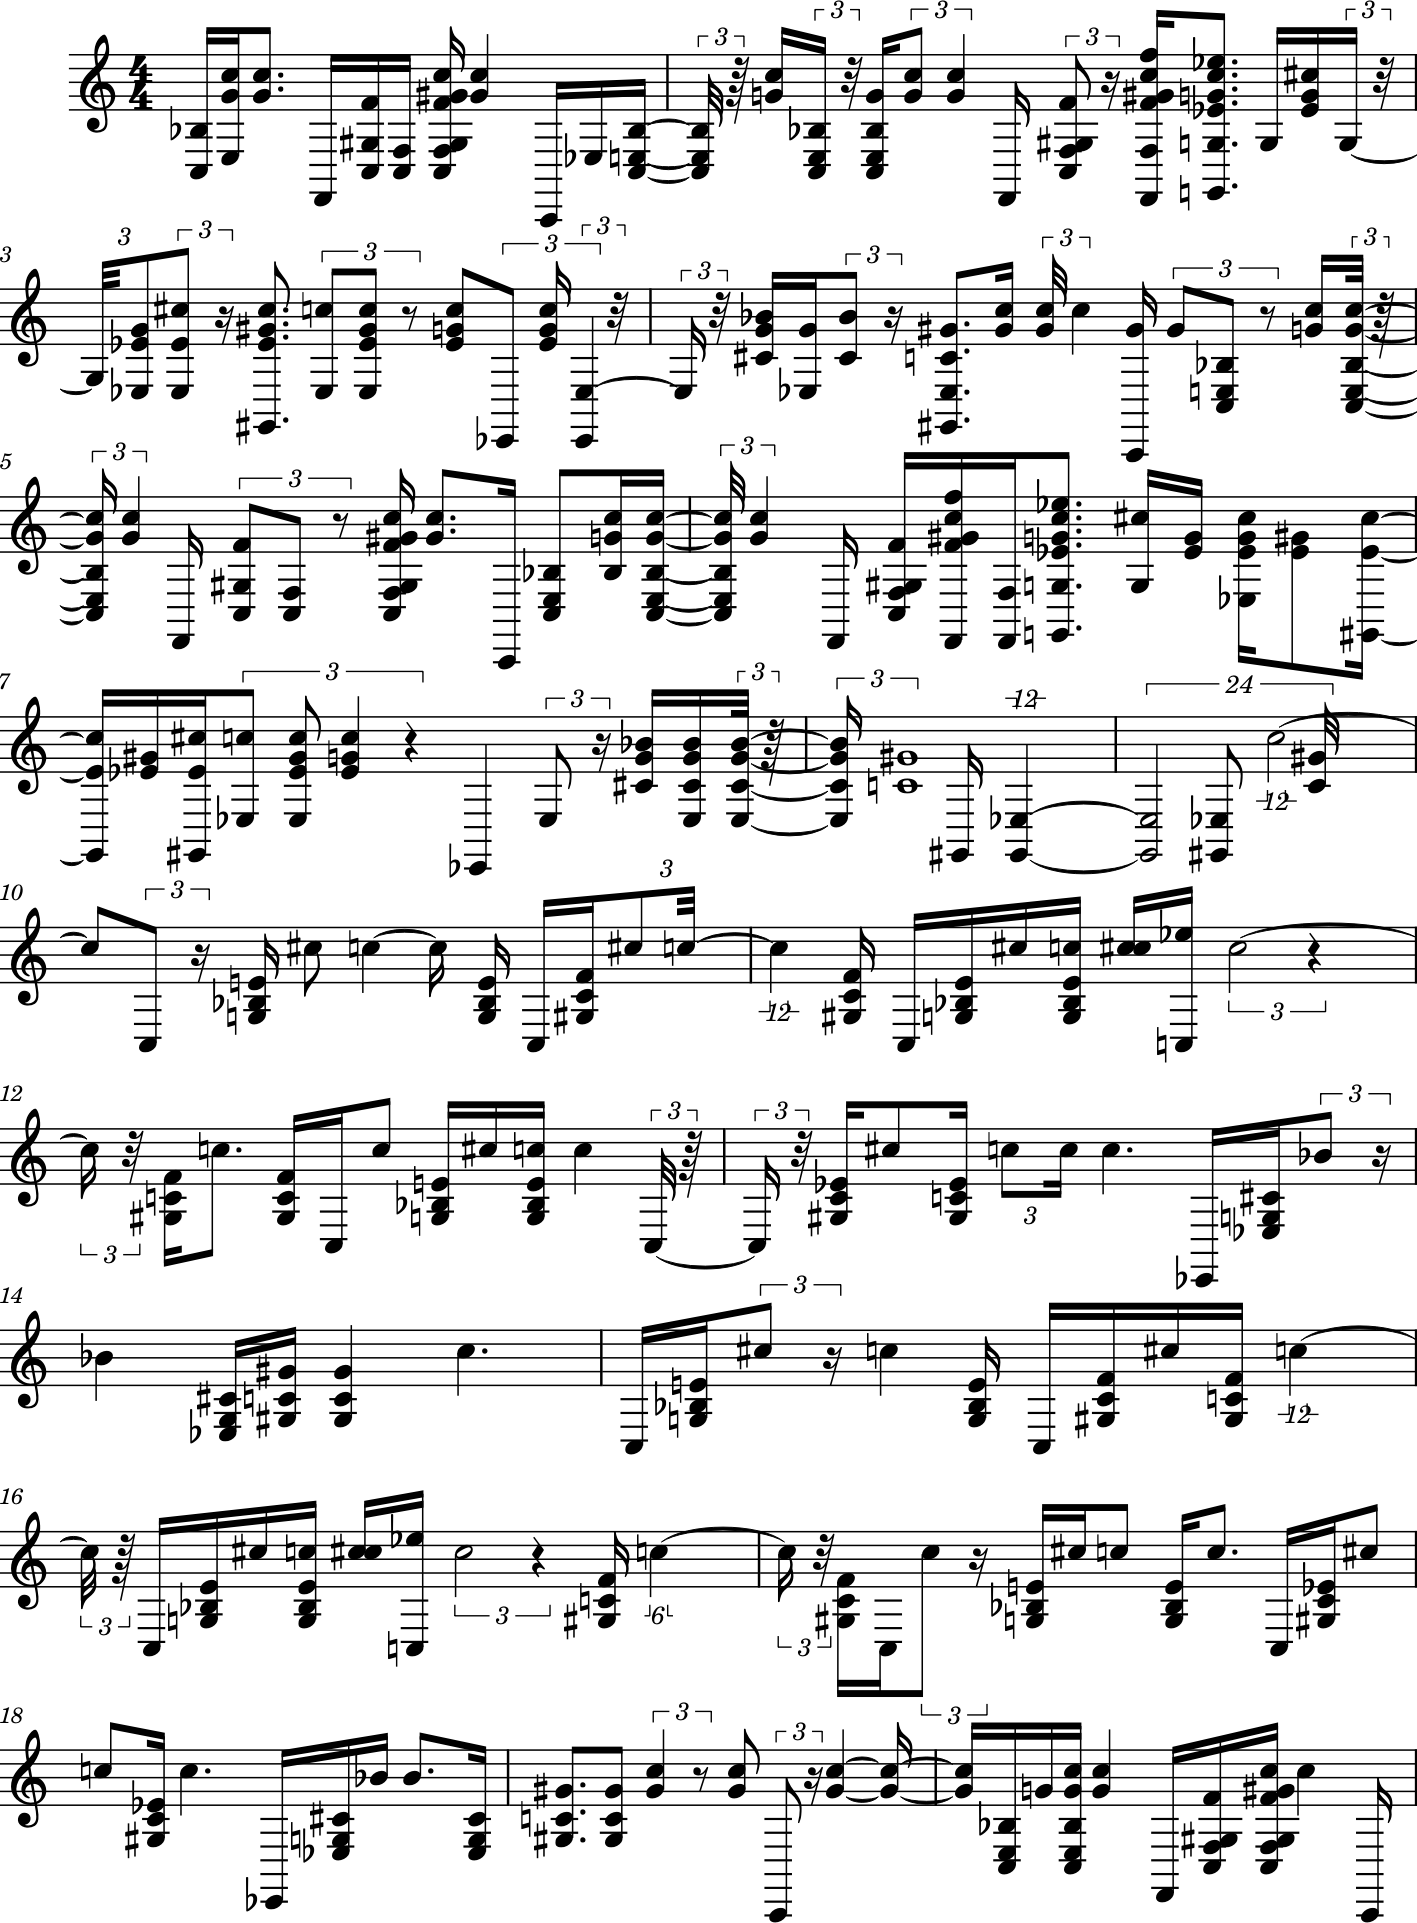

In [32]:
midi_stream.show()